<a href="https://colab.research.google.com/github/jen0525/DATAthon/blob/main/SC_yankee_stadium_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# 데이터 로드
file_path = '/content/drive/My Drive/Colab Notebooks/projects/DATAthon/Airbnb/AB_NYC_2019.csv'  # 파일 경로 (Colab에서는 직접 업로드한 경우 사용)
df = pd.read_csv(file_path)

# 데이터 미리보기
df.head()

Mounted at /content/drive


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
from geopy.distance import geodesic

# 양키 스타디움 좌표
yankee_stadium_coords = (40.8296, -73.9262)

# 10km 이내는 'within_10km', 10km 밖은 'outside_10km'로 설정
df['location_category'] = df.apply(
    lambda row: 'within_10km' if geodesic(yankee_stadium_coords, (row['latitude'], row['longitude'])).km <= 10 else 'outside_10km',
    axis=1
)

# 추가된 컬럼 확인
df[['latitude', 'longitude', 'location_category']].head()

,latitude,longitude,location_category
0,40.64749,-73.97237,outside_10km
1,40.75362,-73.98377,within_10km
2,40.80902,-73.94190,within_10km
3,40.68514,-73.95976,outside_10km
4,40.79851,-73.94399,within_10km


### Step 1: location_category 값을 설정

- 10km 이내 숙소 → "within_10km"
- 10km 밖 숙소 → "outside_10km"

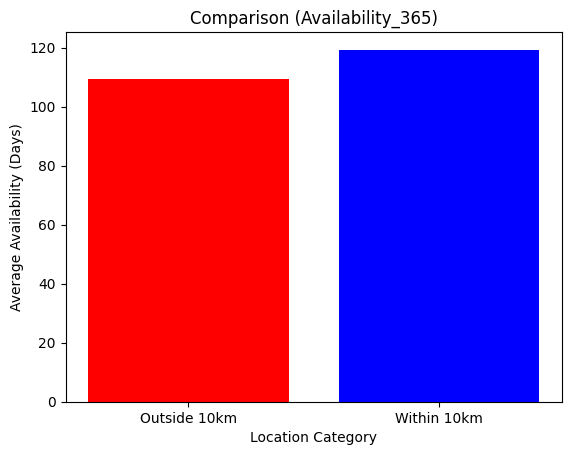

location_category
Outside 10km    109.548182
Within 10km     119.308903
Name: availability_365, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# 'location_category' 컬럼을 사용하여 그룹화
availability_stats = df.groupby('location_category')['availability_365'].mean()

# 인덱스 설정 ('within_10km' → 'Within 10km', 'outside_10km' → 'Outside 10km')
availability_stats = availability_stats.rename(index={'within_10km': 'Within 10km', 'outside_10km': 'Outside 10km'})

# 시각화
plt.bar(availability_stats.index, availability_stats, color=['red', 'blue'])
plt.xlabel('Location Category')
plt.ylabel('Average Availability (Days)')
plt.title('Comparison (Availability_365)')
plt.show()

# 결과 출력
print(availability_stats)

### Step 2: 숙박 가능일(availability_365) 비교

- within_10km 숙소(119.31일) > outside_10km 숙소(109.55일)
- 양키 스타디움 근처(10km 이내) 숙소들이 연간 숙박 가능일이 더 많음
- 홈경기 및 도심지 접근성이 높은 곳일수록 숙소 운영이 활발할 가능성이 있음

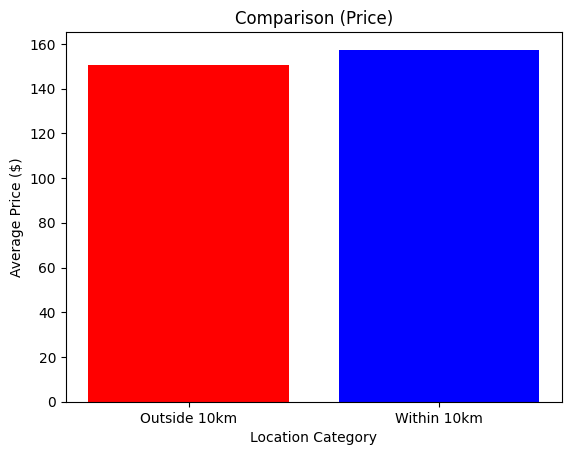

location_category
Outside 10km    150.421481
Within 10km     157.362682
Name: price, dtype: float64


In [ ]:
# 'location_category' 컬럼을 사용하여 그룹화
price_stats = df.groupby('location_category')['price'].mean()

# 인덱스 설정 ('within_10km' → 'Within 10km', 'outside_10km' → 'Outside 10km')
price_stats = price_stats.rename(index={'within_10km': 'Within 10km', 'outside_10km': 'Outside 10km'})

# 시각화
plt.bar(price_stats.index, price_stats, color=['red', 'blue'])
plt.xlabel('Location Category')
plt.ylabel('Average Price ($)')
plt.title('Comparison (Price)')
plt.show()

# 결과 출력
print(price_stats)

# Step 3: 숙박료(price) 비교 완료

- within_10km 숙소($157.36) > outside_10km 숙소($150.42)
- 양키 스타디움 근처 숙소들이 평균적으로 더 비쌈
- 도심 접근성과 경기 관람 수요가 숙박료 상승에 영향을 끼쳤을 수 있음

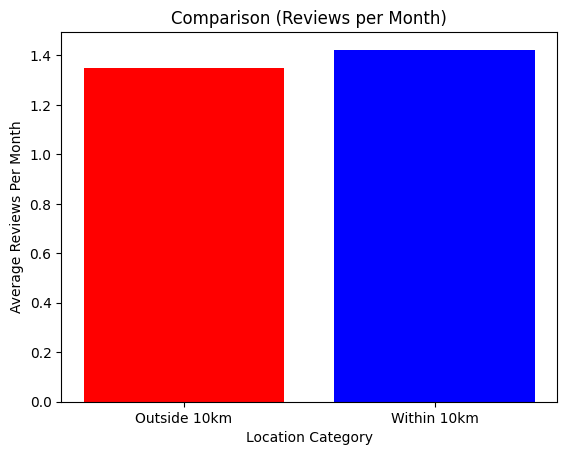

location_category
Outside 10km    1.349354
Within 10km     1.423054
Name: reviews_per_month, dtype: float64


In [ ]:
# 'location_category' 컬럼을 사용하여 그룹화
reviews_per_month_stats = df.groupby('location_category')['reviews_per_month'].mean()

# 인덱스 설정 ('within_10km' → 'Within 10km', 'outside_10km' → 'Outside 10km')
reviews_per_month_stats = reviews_per_month_stats.rename(index={'within_10km': 'Within 10km', 'outside_10km': 'Outside 10km'})

# 시각화
plt.bar(reviews_per_month_stats.index, reviews_per_month_stats, color=['red', 'blue'])
plt.xlabel('Location Category')
plt.ylabel('Average Reviews Per Month')
plt.title('Comparison (Reviews per Month)')
plt.show()

# 결과 출력
print(reviews_per_month_stats)

### Step 4: 월별 리뷰 개수(reviews_per_month) 비교 완료

- within_10km 숙소(월 1.42개 리뷰) > outside_10km 숙소(월 1.35개 리뷰)
- 양키 스타디움 근처 숙소들이 고객 피드백이 더 활발함
- 경기장과 가까운 숙소일수록 예약이 자주 이루어질 가능성

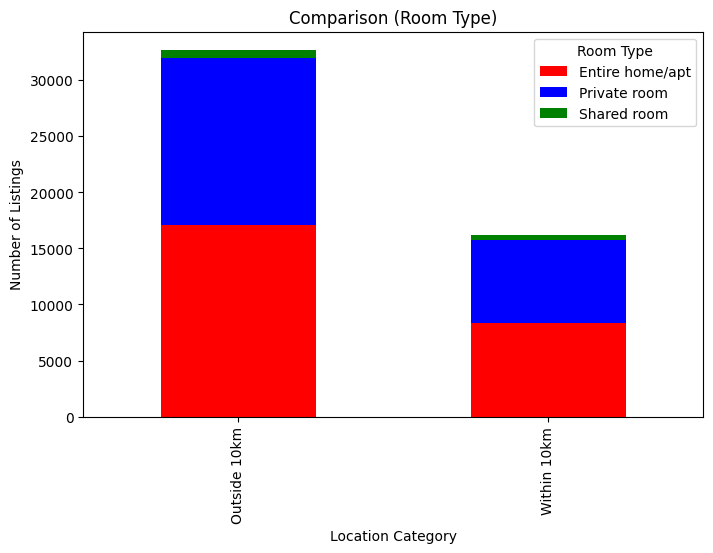

room_type          Entire home/apt  Private room  Shared room
location_category                                            
Outside 10km                 17083         14922          694
Within 10km                   8326          7404          466


In [ ]:
import matplotlib.pyplot as plt

# 'location_category'와 'room_type'을 함께 그룹화하여 개수 계산
room_type_stats = df.groupby(['location_category', 'room_type']).size().unstack()

# 인덱스 설정 ('within_10km' → 'Within 10km', 'outside_10km' → 'Outside 10km')
room_type_stats = room_type_stats.rename(index={'within_10km': 'Within 10km', 'outside_10km': 'Outside 10km'})

# 시각화 (stacked bar chart)
room_type_stats.plot(kind='bar', stacked=True, figsize=(8, 5), color=['red', 'blue', 'green'])
plt.xlabel('Location Category')
plt.ylabel('Number of Listings')
plt.title('Comparison (Room Type)')
plt.legend(title='Room Type')
plt.show()

# 4. 결과 출력
print(room_type_stats)


### Step 5: 숙소 유형(room_type) 비교 완료

1. within_10km 숙소:
- Entire home/apt: 8,326개
- Private room: 7,404개
- Shared room: 466개

2.  outside_10km 숙소:
- Entire home/apt: 17,083개
- Private room: 14,922개
- Shared room: 694개

---

- 양키 스타디움 근처는 Private room 비율이 상대적으로 높음
- 도심과 가까운 지역일수록 공유 숙소(Private room, Shared room)의 비율이 높은 경향

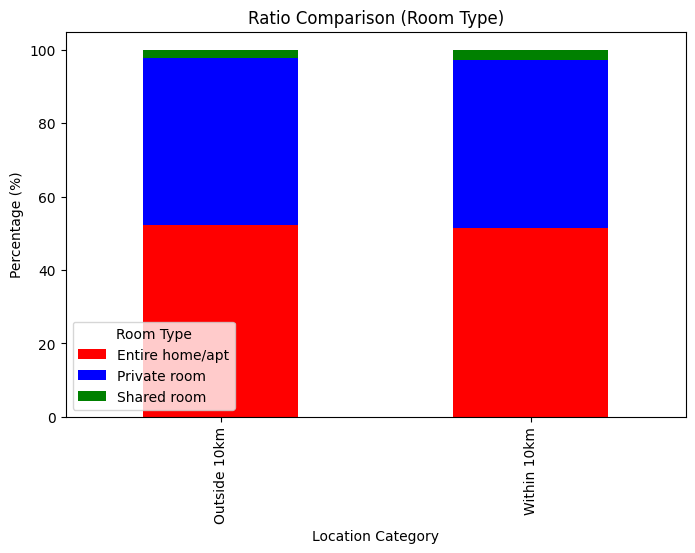

room_type          Entire home/apt  Private room  Shared room
location_category                                            
Outside 10km                 52.24         45.63         2.12
Within 10km                  51.41         45.71         2.88


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 'location_category'와 'room_type'을 함께 그룹화하여 개수 계산
room_type_stats = df.groupby(['location_category', 'room_type']).size().unstack()

# 2. 인덱스 변경 ('within_10km' → 'Within 10km', 'outside_10km' → 'Outside 10km')
room_type_stats = room_type_stats.rename(index={'within_10km': 'Within 10km', 'outside_10km': 'Outside 10km'})

# 3. 각 위치 내에서 숙소 유형별 비율 계산
total_counts = room_type_stats.sum(axis=1)  # 각 위치의 총 숙소 개수
room_type_percentage = room_type_stats.div(total_counts, axis=0) * 100  # 비율 계산

# 4. 시각화 (stacked bar chart, 비율 표시)
room_type_percentage.plot(kind='bar', stacked=True, figsize=(8, 5), color=['red', 'blue', 'green'])
plt.xlabel('Location Category')
plt.ylabel('Percentage (%)')
plt.title('Ratio Comparison (Room Type)')
plt.legend(title='Room Type')
plt.show()

# 5. 결과 출력 (소수점 두 자리까지 반올림)
room_type_percentage = np.round(room_type_percentage, 2)
print(room_type_percentage)

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.distance import geodesic


# 지도 생성 (뉴욕 중심 좌표)
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Marker Cluster 추가
marker_cluster = MarkerCluster().add_to(nyc_map)

# 데이터 샘플링 (랜덤 1000개)
df_sample = df.sample(n=min(1000, len(df)), random_state=42)  # 데이터가 많을 경우 샘플링

# 숙소 데이터 마커 추가 (색상은 위치 카테고리에 따라 다르게 설정)
for _, row in df_sample.iterrows():
    location = (row['latitude'], row['longitude'])
    category = row['location_category']

    # 색상 설정
    color = 'blue' if category == 'within_10km' else 'red'

    # 마커 추가
    folium.Marker(
        location,
        popup=f"Price: ${row['price']}, Type: {row['room_type']}",
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# 양키 스타디움 위치 마커 추가
folium.Marker(
    yankee_stadium_coords,
    popup="Yankee Stadium",
    icon=folium.Icon(color="green", icon="info-sign")
).add_to(nyc_map)

# 6. 지도 표시
nyc_map